# Final Report

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
# library(themis)
options(repr.matrix.max.rows = 7)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

## Reading the data

In [10]:
drugs_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Assigning column names

In [3]:
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Neuroticism", "Extraversion", 
                          "Openness_to_Experience", "Agreeableness", "Conscientiousness", "Impulsiveness", 
                          "Sensation_Seeing", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke",
                          "Crack", "Ecstacy", "Heorin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA")
drugs_data

ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,⋯,Ecstacy,Heorin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,NA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Removing unneccesary variables

In [4]:
alcohol_data <- select(drugs_data, Age, Neuroticism,
                       Extraversion, Openness_to_Experience,
                       Agreeableness, Impulsiveness, Conscientiousness, Alcohol, Semer)
alcohol_data

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Alcohol,Semer
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.21712,-0.00665,CL5,CL2
-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.71126,-0.14277,CL5,CL4
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,CL6,CL0
-0.95197,-0.14882,-0.80615,-0.01928,0.59042,-1.37983,0.58489,CL4,CL2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.07854,1.13281,-1.37639,-1.27553,-1.77200,0.52975,-1.38502,CL4,CL6
-0.95197,0.91093,-1.92173,0.29338,-1.62090,1.29221,-2.57309,CL5,CL4
-0.95197,-0.46725,2.12700,1.65653,1.11406,0.88113,0.41594,CL4,CL6


### Filtering out irrelevant observations

In [5]:
alcohol_data_filtered <- alcohol_data |>
                         filter(Semer == "CL0") |>
                         select(-Semer)
alcohol_data_filtered

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,CL6
0.49788,-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,CL5
1.82213,-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,CL5
1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,CL5
2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,CL5
-0.95197,-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,CL5


### Distribution of the response variable

In [6]:
alcohol_count <- group_by(alcohol_data, Alcohol) |>
                 summarize(n = n()) |>
                 bind_cols(c("Never Used", "Used over a Decade Ago", "Used in Last Decade",
             "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"))
colnames(alcohol_count) <- c("Class", "No. of Individuals", "Meaning")
alcohol_count

New names:
• `` -> `...3`


Class,No. of Individuals,Meaning
<chr>,<int>,<chr>
CL0,34,Never Used
CL1,34,Used over a Decade Ago
CL2,68,Used in Last Decade
CL3,198,Used in Last Year
CL4,287,Used in Last Month
CL5,759,Used in Last Week
CL6,505,Used in Last Day


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



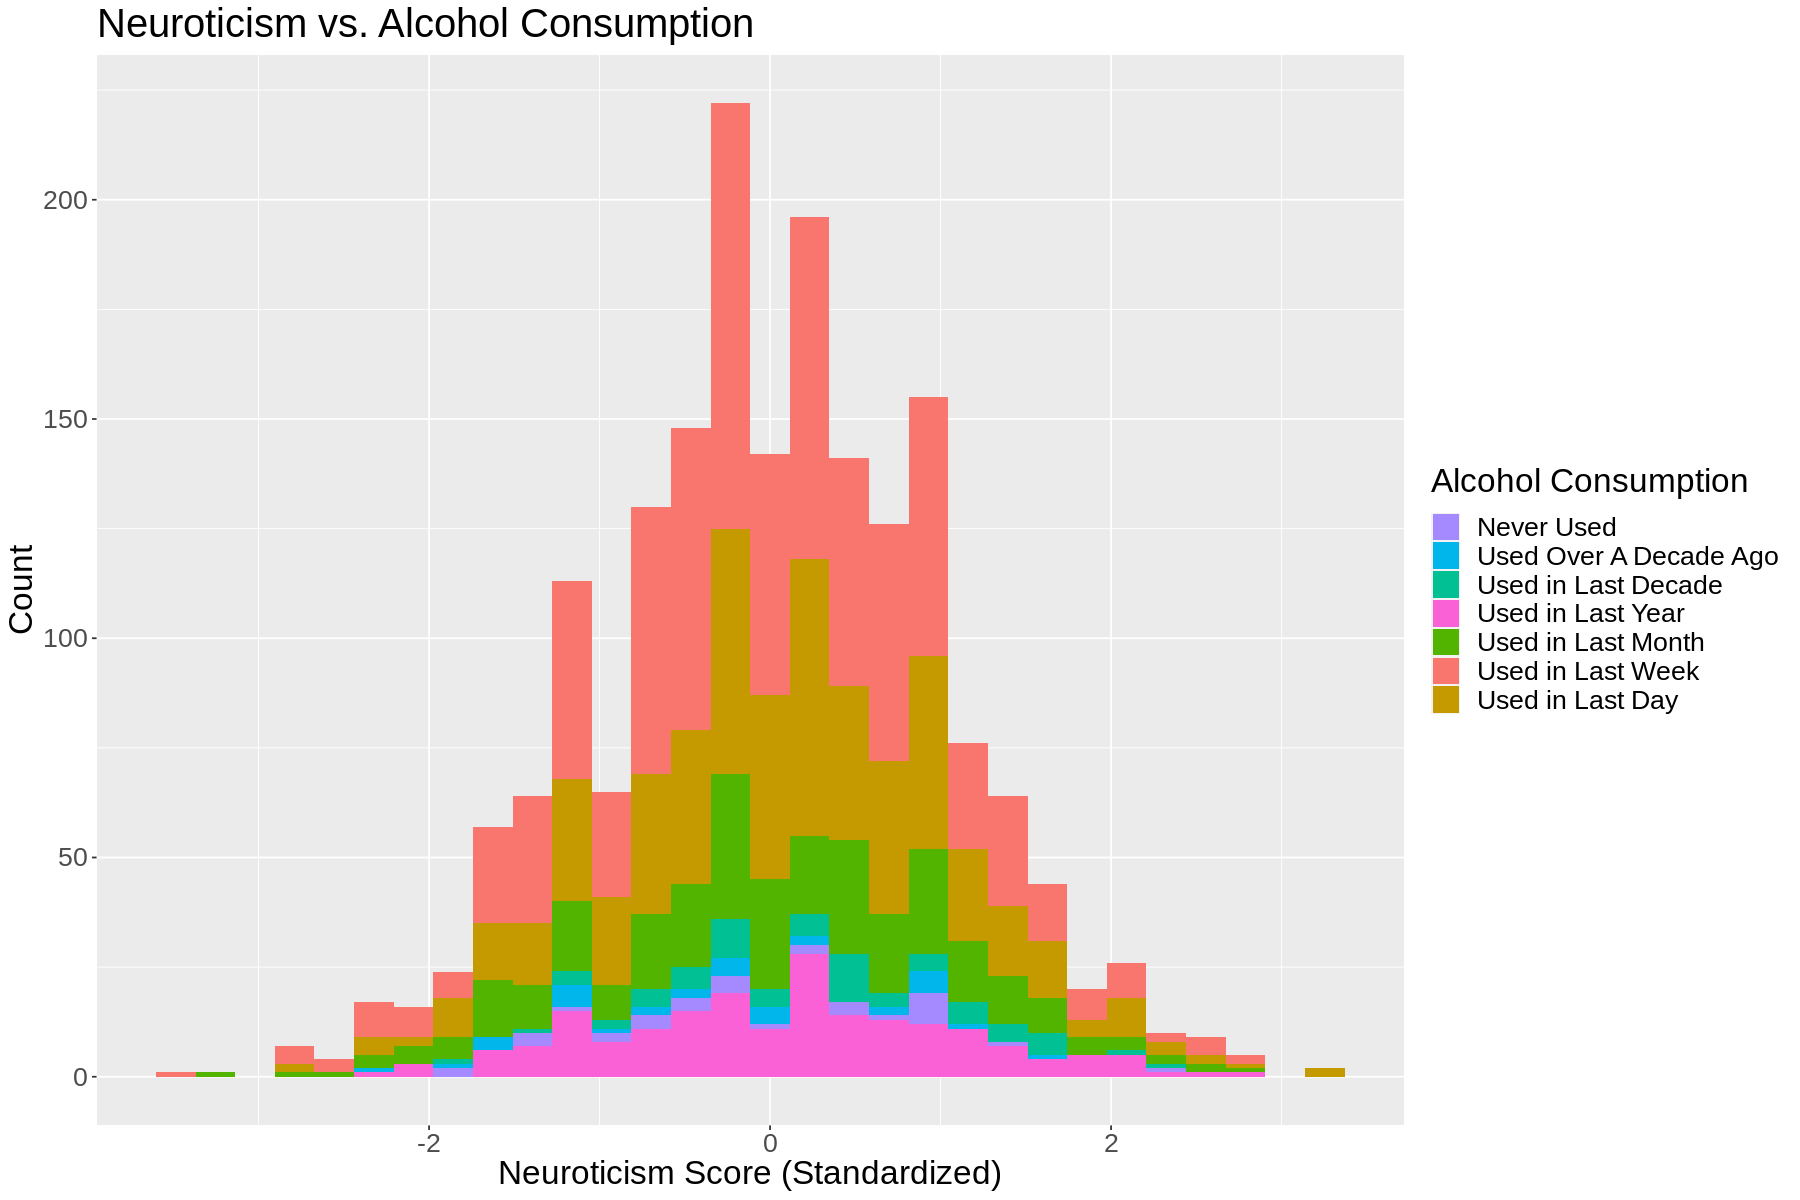

In [11]:
options(repr.plot.width = 15, repr.plot.height = 10)
nscore <- ggplot(alcohol_data, aes(x = Neuroticism, fill = as_factor(Alcohol))) +
          geom_histogram() + 
          scale_fill_discrete(breaks = c("CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"),
                            labels = c("Never Used", "Used Over A Decade Ago", "Used in Last Decade", "Used in Last Year", 
                                      "Used in Last Month", "Used in Last Week", "Used in Last Day")) +
          labs(x = "Neuroticism Score (Standardized)", y = "Count", fill = "Alcohol Consumption") +
          ggtitle("Neuroticism vs. Alcohol Consumption") +
          theme(text = element_text(size = 20))

nscore

In [ ]:
ggpairs(alcohol_data)

### Forward selection

In [9]:
names <- colnames(alcohol_data |> select(-Alcohol))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
alcohol_vfold <- vfold_cv(alcohol_data, v = 5, strata = Alcohol)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Alcohol", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        alcohol_recipe <- recipe(as.formula(model_string), 
                                data = alcohol_data) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(alcohol_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = alcohol_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

x Fold1: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold2: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold3: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold4: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

x Fold5: preprocessor 1/1:
  Error in `check_type()`:
  ! All columns selected for the step should be numeric

Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


ERROR: [1m[33mError[39m in [1m[1m`estimate_tune_results()`:[22m
[33m![39m All of the models failed. See the .notes column.
